In [101]:
import pandas as pd

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np

In [103]:
df=pd.read_csv('911.csv')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645716 entries, 0 to 645715
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        645716 non-null  float64
 1   lng        645716 non-null  float64
 2   desc       645716 non-null  object 
 3   zip        567493 non-null  float64
 4   title      645716 non-null  object 
 5   timeStamp  645716 non-null  object 
 6   twp        645434 non-null  object 
 7   addr       645716 non-null  object 
 8   e          645716 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 32.0+ MB


In [105]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [106]:
df['zip'].value_counts().head()

19401.0    44247
19464.0    42630
19403.0    33934
19446.0    31323
19406.0    21865
Name: zip, dtype: int64

In [107]:
df['twp'].value_counts().head()

LOWER MERION    54204
ABINGTON        38929
NORRISTOWN      36471
UPPER MERION    35098
CHELTENHAM      29774
Name: twp, dtype: int64

In [108]:
len(df['title'].unique())# or nunique()

147

In [109]:
x=df['title'].iloc[0]

In [110]:
x.split(':')[0]

'EMS'

In [111]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [112]:
df['Reason']

0          EMS
1          EMS
2         Fire
3          EMS
4          EMS
          ... 
645711     EMS
645712     EMS
645713     EMS
645714     EMS
645715    Fire
Name: Reason, Length: 645716, dtype: object

In [113]:
df['Reason'].value_counts().head(1)

EMS    322880
Name: Reason, dtype: int64

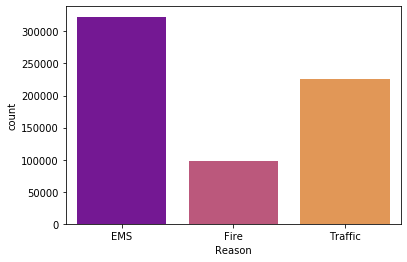

In [114]:
sns.countplot(x='Reason',data=df,palette='plasma')

In [115]:
type(df['timeStamp'].iloc[0])

str

In [116]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [117]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [118]:
time=df['timeStamp'].iloc[0]

In [119]:
time.hour

17

In [120]:
time.month

12

In [121]:
time.second

52

In [122]:
time

Timestamp('2015-12-10 17:10:52')

In [123]:
time.day

10

In [124]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)

In [125]:
df['hour']

0         17
1         17
2         14
3         16
4         16
          ..
645711    13
645712    13
645713    13
645714    13
645715    13
Name: hour, Length: 645716, dtype: int64

In [126]:
df['week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [127]:
df['week']

0         3
1         3
2         3
3         3
4         3
         ..
645711    0
645712    0
645713    0
645714    0
645715    0
Name: week, Length: 645716, dtype: int64

In [128]:
df['month']=df['timeStamp'].apply(lambda time:time.month)

In [129]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,week,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645711,40.136020,-75.354606,BEECH DR & SPRUCE ST; WEST NORRITON; Station ...,19403.0,EMS: FRACTURE,2020-06-08 13:07:24,WEST NORRITON,BEECH DR & SPRUCE ST,1,EMS,13,0,6
645712,40.172526,-75.284653,DEKALB PIKE & BLUE BELL SPRINGS DR; WHITPAIN;...,19422.0,EMS: RESPIRATORY EMERGENCY,2020-06-08 13:10:11,WHITPAIN,DEKALB PIKE & BLUE BELL SPRINGS DR,1,EMS,13,0,6
645713,40.125814,-75.406699,TROOPER RD & TURN LANE; WEST NORRITON; Statio...,NaN,EMS: SYNCOPAL EPISODE,2020-06-08 13:10:41,WEST NORRITON,TROOPER RD & TURN LANE,1,EMS,13,0,6
645714,40.197947,-75.533853,FOXCROFT CIR & FOXMEADOW DR; LIMERICK; Statio...,19468.0,EMS: ALTERED MENTAL STATUS,2020-06-08 13:11:45,LIMERICK,FOXCROFT CIR & FOXMEADOW DR,1,EMS,13,0,6


In [130]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [131]:
df['week']=df['week'].map(dmap)

In [132]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,week,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thu,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645711,40.136020,-75.354606,BEECH DR & SPRUCE ST; WEST NORRITON; Station ...,19403.0,EMS: FRACTURE,2020-06-08 13:07:24,WEST NORRITON,BEECH DR & SPRUCE ST,1,EMS,13,Mon,6
645712,40.172526,-75.284653,DEKALB PIKE & BLUE BELL SPRINGS DR; WHITPAIN;...,19422.0,EMS: RESPIRATORY EMERGENCY,2020-06-08 13:10:11,WHITPAIN,DEKALB PIKE & BLUE BELL SPRINGS DR,1,EMS,13,Mon,6
645713,40.125814,-75.406699,TROOPER RD & TURN LANE; WEST NORRITON; Statio...,NaN,EMS: SYNCOPAL EPISODE,2020-06-08 13:10:41,WEST NORRITON,TROOPER RD & TURN LANE,1,EMS,13,Mon,6
645714,40.197947,-75.533853,FOXCROFT CIR & FOXMEADOW DR; LIMERICK; Statio...,19468.0,EMS: ALTERED MENTAL STATUS,2020-06-08 13:11:45,LIMERICK,FOXCROFT CIR & FOXMEADOW DR,1,EMS,13,Mon,6


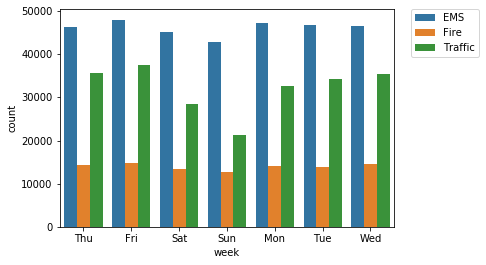

In [133]:
sns.countplot(x='week',data=df,hue='Reason')
#to relocate the legend outside
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

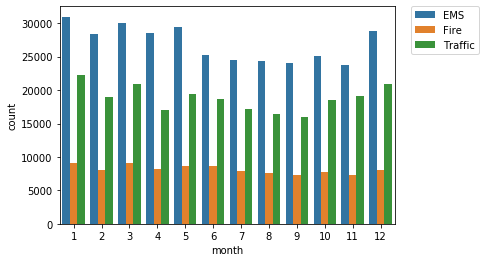

In [134]:
sns.countplot(x='month',data=df,hue='Reason')
#to relocate the legend outside
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [135]:
byMonth=df.groupby('month').count()

In [136]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


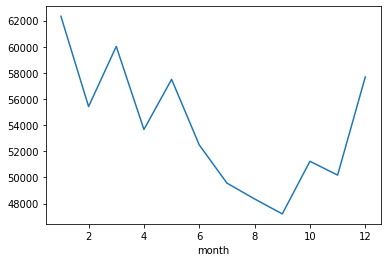

In [137]:
byMonth['lat'].plot()

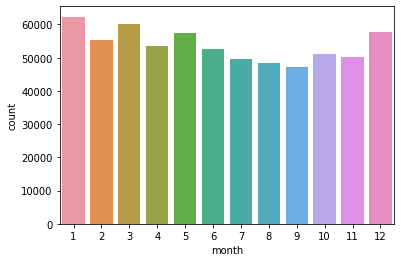

In [138]:
sns.countplot(x='month',data=df)

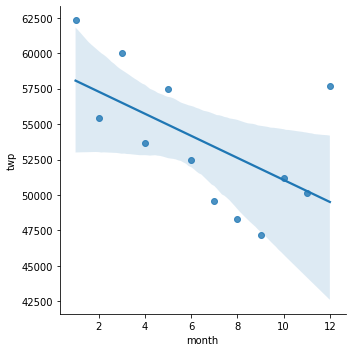

In [139]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [140]:
df['date']=df['timeStamp'].apply(lambda t:t.date())

In [141]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,week,month,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thu,12,2015-12-10


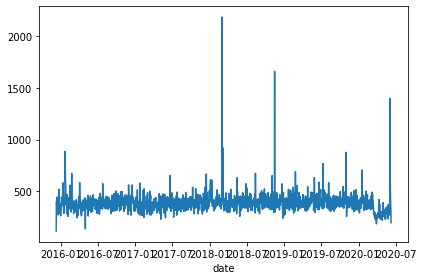

In [142]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

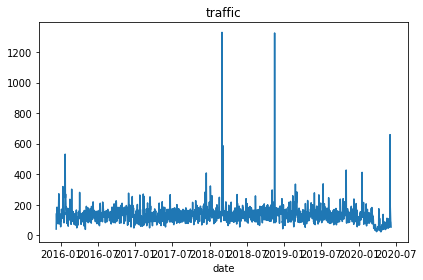

In [143]:
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('traffic')
plt.tight_layout()

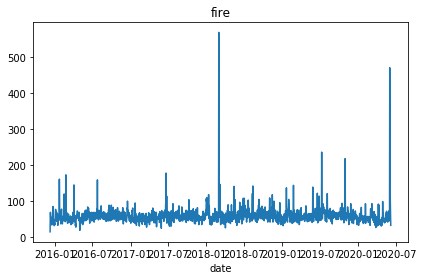

In [144]:
df[df['Reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('fire')
plt.tight_layout()

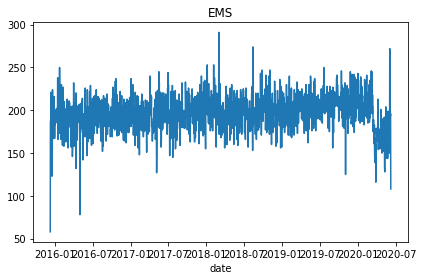

In [145]:
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [147]:
dayHour=df.groupby(by=['week','hour']).count()['Reason'].unstack()

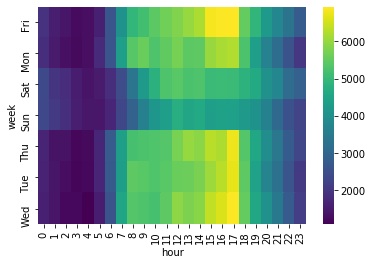

In [149]:
sns.heatmap(dayHour,cmap='viridis')

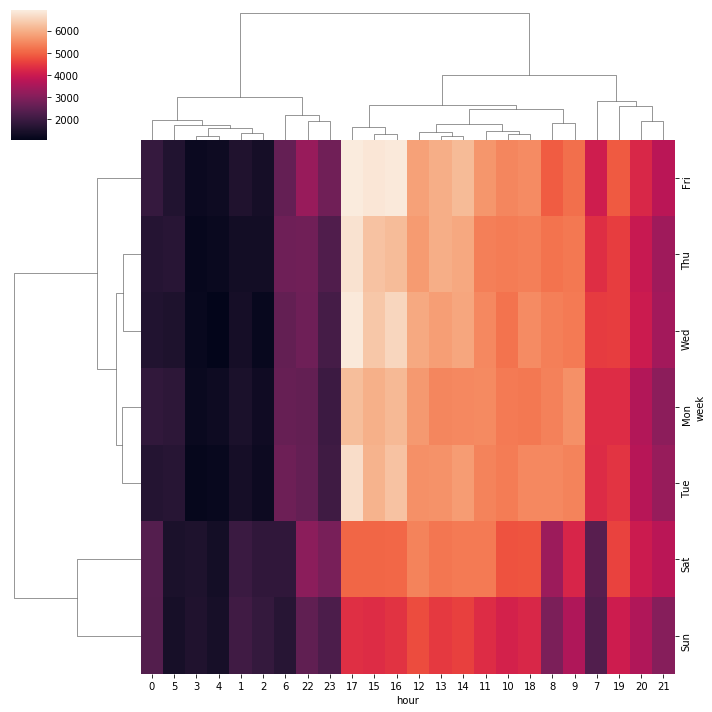

In [150]:
sns.clustermap(dayHour)

In [151]:
dayMonth=df.groupby(by=['week','month']).count()['Reason'].unstack()

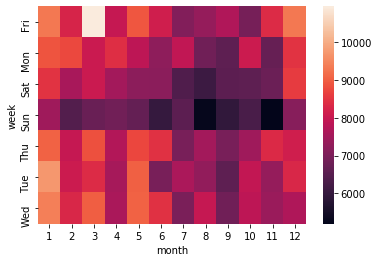

In [152]:
sns.heatmap(dayMonth)

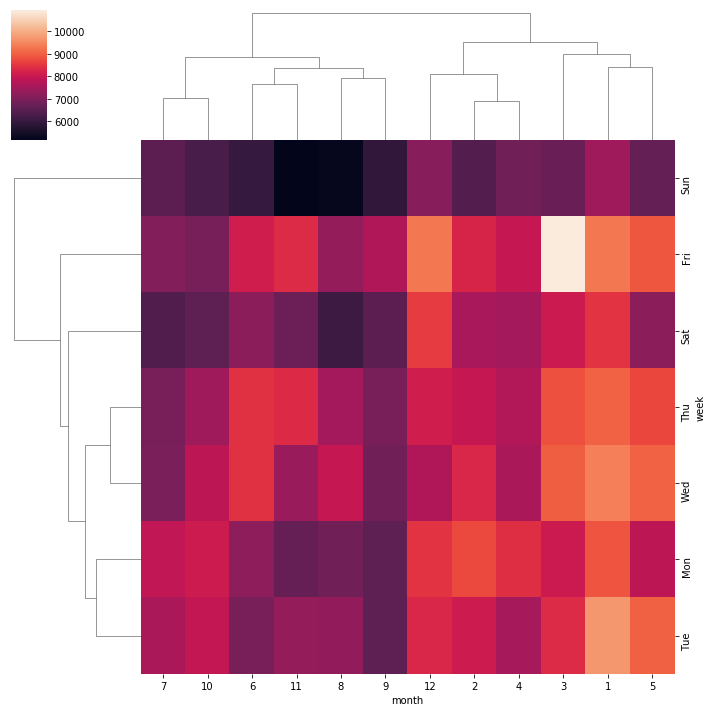

In [153]:
sns.clustermap(dayMonth)